<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

## General instructions

Your job in this exam is to study a dataset, in a similar way you analyzed the project's dataset on the second week of AI Booster.

After question 3 (when you have a clean dataset), every question is independent (you should not spend more than 10m on a question).

You are free to use course material and go online, but you **cannot use generative AI** and you **cannot to communicate with each other**.

## Authorized libraries

These are the libraries you can use:

 - `pandas`
 - `scipy`
 - `numpy`
 - `statistics`
 - `matplotlib`
 - `seaborn`


In [1]:
# Basic imports
import pandas as pd
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sb

### 1 - Load the dataset

Load the `churn_unclean.csv` dataset in a dataframe.

This is a very classical classification dataset, where the obective is to predict the last column (whether a given customer exited).

Take the time to look at each column, print out the qualitative columns and quantitative one separately. *Be careful, numerical data can sometimes be used for categorical variables!* 

In [21]:
# df = pd.read_csv('./churn_unclean.csv', header=0, sep = ',', index_col='RowNumber')
df = pd.read_csv('./churn_unclean.csv', header=0, sep = ',')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          9762 non-null   object 
 3   CreditScore      9762 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [23]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
RowNumber,1,2,3,4,5,6,7,8,9,10
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?
CreditScore,619.0,608.0,502.0,699.0,850.0,645.0,822.0,376.0,501.0,684.0
Geography,France,Spain,France,France,Spain,Spain,France,Germany,France,France
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male
Age,42,41,42,39,43,44,50,29,44,27
Tenure,2,1,8,1,2,8,7,4,4,2
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88
NumOfProducts,1,1,3,2,1,2,2,4,2,1


In [24]:
# qualitative columns
quant_col = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]

#categorical columns
cat_col = df[['RowNumber','CustomerId', 'Surname', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

In [25]:
print(f"Qualitative columns : {quant_col.columns}")
print(f"Categorical columns : {cat_col.columns}")

print(quant_col)
print(cat_col)

Qualitative columns : Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')
Categorical columns : Index(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')
      CreditScore  Age  Tenure    Balance  EstimatedSalary
0           619.0   42       2       0.00        101348.88
1           608.0   41       1   83807.86        112542.58
2           502.0   42       8  159660.80        113931.57
3           699.0   39       1       0.00         93826.63
4           850.0   43       2  125510.82         79084.10
...           ...  ...     ...        ...              ...
9995        771.0   39       5       0.00         96270.64
9996        516.0   35      10   57369.61        101699.77
9997          NaN   36       7       0.00         42085.58
9998        772.0   42       3   75075.31         92888.52
9999        792.0   28       4  130142.79         38190.78

[1000

### 2 - Cleanup dataset 1/2

Get rid of rows including null values. Print out the number of rows deleted.

Get rid of the `RowNumber`, `CustomerId` and `Surname` columns.


In [42]:
churn_nan = df.copy()

In [43]:
churn_nan.isna().sum()

RowNumber            0
CustomerId           0
Surname            238
CreditScore        238
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [44]:
churn_df = churn_nan.dropna()

In [45]:
print(f"Got rid of {len(churn_nan) - len(churn_df)} rows")

Got rid of 238 rows


In [46]:
churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace= True)

/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_15940/179760271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace= True)


In [47]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800.0,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 3 Cleanup dataset 2/2

 - Get rid of outliers in the Age columns. Print out the number of rows deleted.
 - Get rid of negative balance values. Print out the number of rows deleted.


In [48]:
churn_df['Age'].describe()

count    9762.000000
mean       41.047634
std        31.109785
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max       537.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

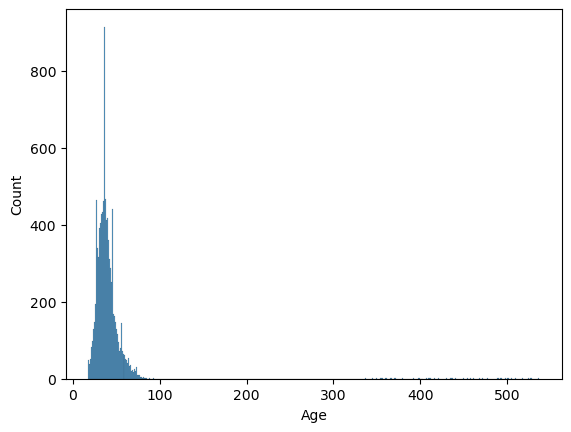

In [49]:
sb.histplot(churn_df['Age'])

In [50]:
print(f"Number of row deleted : {len(churn_df.loc[churn_df['Age'] > 100])}")

churn_df = churn_df.loc[churn_df['Age'] <= 100]

Number of row deleted : 53


In [52]:
print(f"Number of row deleted : {len(churn_df.loc[churn_df['Balance'] < 0])}")

churn_df = churn_df.loc[churn_df['Balance'] >= 0]

Number of row deleted : 27


### 4 - Credit score analysis

Study the `CreditScore` column, computing descriptive statistics (mean, std, quantiles, etc.) that you find relevant, and plot the distribution of values. 

Write in a markdown cell what are your conclusion from this analysis.


In [56]:
churn_df['CreditScore'].mean()

650.0940921297253

In [64]:
churn_df['CreditScore'].mode()

0    850.0
Name: CreditScore, dtype: float64

In [57]:
churn_df['CreditScore'].std()

96.6128965510746

In [63]:
print(churn_df['CreditScore'].quantile(0.25))
print(churn_df['CreditScore'].median())
print(churn_df['CreditScore'].quantile(0.75))

583.0
652.0
717.0


<Axes: xlabel='CreditScore', ylabel='Count'>

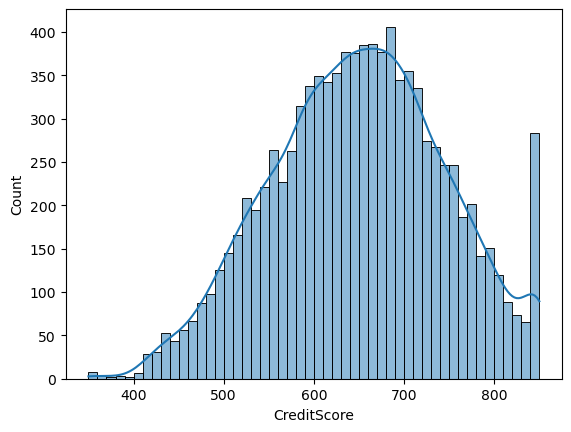

In [68]:
sb.histplot(churn_df['CreditScore'], kde = True, bins = 50)

Answer = The CreditScore values are roughly evenly distributed around the median of 652.0, with a mean of 650.1, and nearly half of the data are distributed between the quartiles of 583.0 and 717.0. And according to the heavy number of 850.0, and histogram visualization analysis found in the tail end of the data around 850 appeared very high data distribution, we can be in-depth study and analysis.

### 5 - Geography analysis

Plot the distribution (in counts) of the `Geography` column.


In [71]:
churn_df['Geography'].value_counts()

France     4859
Germany    2419
Spain      2404
Name: Geography, dtype: int64

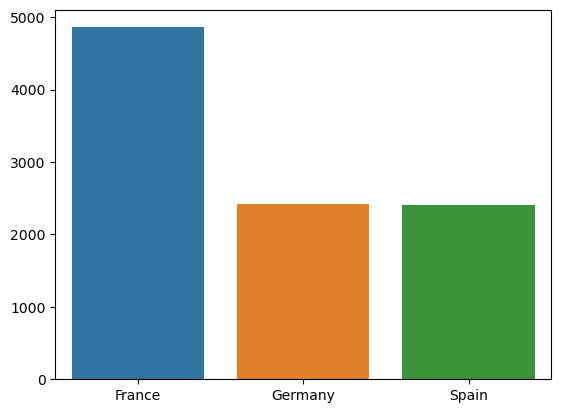

In [78]:
sb.barplot(x = churn_df['Geography'].value_counts().index, y = churn_df['Geography'].value_counts().values);

### 6 - Correlation analysis

Build a scatter plot matrix for each pair of these quantitative variables (`'Balance', 'CreditScore', 'EstimatedSalary'` => 3x3 matrix)

**Bonus: use the target variable (`Exited`) to color the dots.**

Write in a markdown cell your conclusion from these plots.


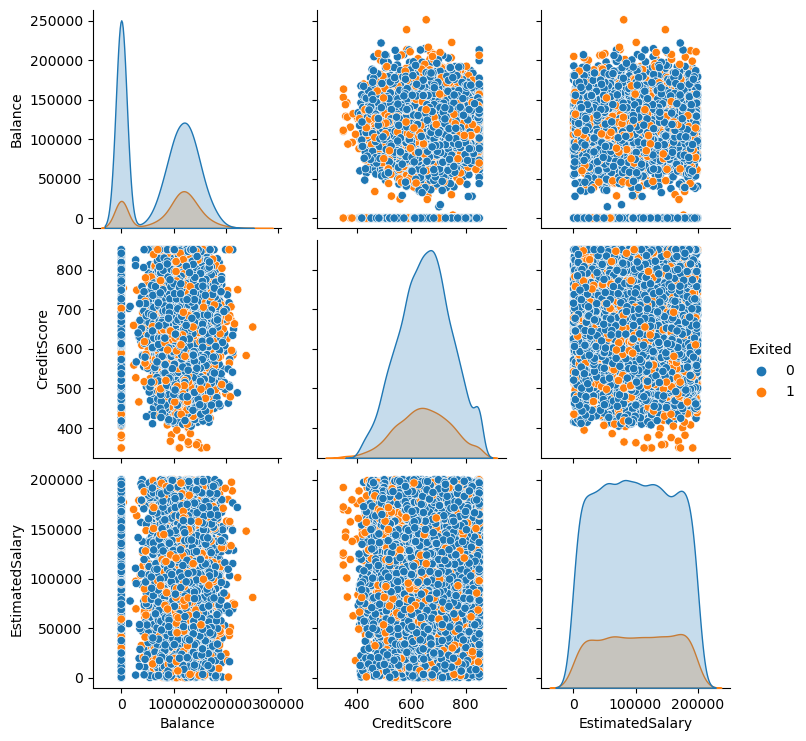

In [81]:
sb.pairplot(churn_df[['Balance', 'CreditScore', 'EstimatedSalary', 'Exited']], hue='Exited')

### 7 - Contingency tables

Analyze in details the correlations between `IsActiveMember` and `HasCrCard` columns by building a contingency table.

Propose a visual representation of this contingency table.


In [84]:
ctgy_tab = pd.crosstab(churn_df['IsActiveMember'], churn_df['HasCrCard'])
ctgy_tab

HasCrCard,0,1
IsActiveMember,,
0,1354,3336
1,1496,3496


### 8 - Test independence of variables

Perform a statistical independence test for these variables (`IsActiveMember` and `HasCrCard` columns).

Write your interpretation of the test results in a markdown cell.


In [86]:
chi2, p, dof, expected_freq = sc.stats.chi2_contingency(ctgy_tab)

print(f"p-value : {p}")

n = ctgy_tab.values.sum()
k = ctgy_tab.shape[0]
r = ctgy_tab.shape[1]
V = np.sqrt(chi2 / (n * min(k-1, r-1)))
print("Cramer's V:", V)

observed_table = ctgy_tab
expected_table = expected_freq
n = ctgy_tab.values.sum()

residual_table = (observed_table - expected_table) / np.sqrt(expected_table)

print("Observed Table:")
print(observed_table)
print("\nExpected Table:")
print(expected_table)
print("\nResidual Table:")
print(residual_table)


p-value : 0.2450672301078537
Cramer's V: 0.01181349476459238
Observed Table:
HasCrCard          0     1
IsActiveMember            
0               1354  3336
1               1496  3496

Expected Table:
[[1380.55153894 3309.44846106]
 [1469.44846106 3522.55153894]]

Residual Table:
HasCrCard              0         1
IsActiveMember                    
0              -0.714601  0.461543
1               0.692648 -0.447364


Answer = These are two categorical variables so I used chi-square test. After hypothesis testing we hypothesized H0 as the observed frequencies are not significantly different from the expected frequencies, here I assumed a significance level of 0.05, then after calculating this we got the p-value of the chi-square test as 0.24506, which is much more than 0.05 so I could not state that the two variables are significantly related.

### 9 - Normal distribution fit

Fit a Normal distribution on the `CreditScore` column.

Write your conclusion from this plot in a markdown cell.


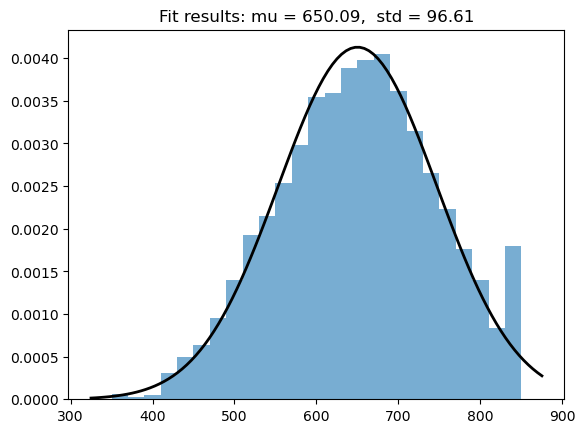

In [89]:
mu, std = sc.stats.norm.fit(churn_df['CreditScore'])

plt.hist(churn_df['CreditScore'], bins=25, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sc.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Answer : Aside from the large outliers in the tails, the CreditScore generally conforms to a normal distribution with mu = 650.09 and a standard deviation of 96.61.